#Importing Libraries

In [3]:
import numpy as np # linear algebra
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
%matplotlib inline        

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [4]:
df = pd.read_csv('/content/coursea_data.csv')

In [5]:
df.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [6]:
df.tail()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
886,236,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,Intermediate,52k
887,883,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,Mixed,21k
888,545,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,Intermediate,30k
889,875,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,Intermediate,9.8k
890,163,Финансовые инструменты для частного инвестора,National Research University Higher School of ...,SPECIALIZATION,4.7,Beginner,38k


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   891 non-null    object 
 4   course_rating             891 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 48.9+ KB


In [8]:
df.describe()

,Unnamed: 0,course_rating
count,891.000000,891.000000
mean,445.000000,4.677329
std,257.353842,0.162225
min,0.000000,3.300000
25%,222.500000,4.600000
50%,445.000000,4.700000
75%,667.500000,4.800000
max,890.000000,5.000000


In [9]:
df.kurt()

Unnamed: 0      -1.200000
course_rating    8.634806
dtype: float64

In [10]:
df.mean()

Unnamed: 0       445.000000
course_rating      4.677329
dtype: float64

In [11]:
df.var()

Unnamed: 0       66231.000000
course_rating        0.026317
dtype: float64

In [12]:
df.isnull().sum()

Unnamed: 0                  0
course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64

#converting course_students_enrolled values to integers

In [13]:

df.course_students_enrolled.replace(r'[km]+$', '', regex=True).astype(float)
df['course_students_enrolled']=(df.course_students_enrolled.replace(r'[km]+$', '', regex=True).astype(float)*df.course_students_enrolled.str.extract(r'[\d\.]+([km]+)', expand=False).replace(['k','m'], [10**3, 10**6])).astype('int64')
df['course_students_enrolled']

0        5300
1       17000
2      130000
3       91000
4      320000
        ...  
886     52000
887     21000
888     30000
889      9800
890     38000
Name: course_students_enrolled, Length: 891, dtype: int64

#SCATTER PLOT

<Figure size 1152x864 with 0 Axes>

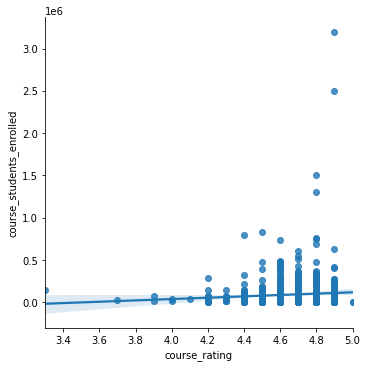

In [14]:

plt.figure(figsize=(16,12))
sns.lmplot(x='course_rating',y='course_students_enrolled',data=df)

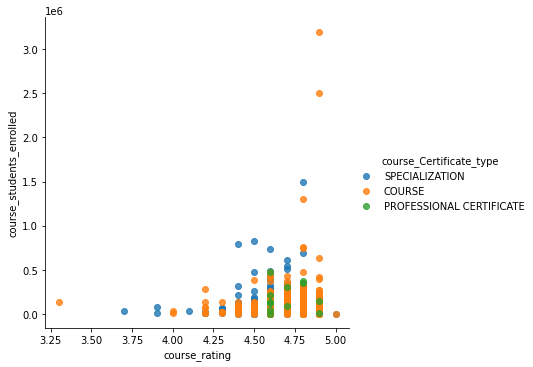

In [15]:
sns.lmplot(x='course_rating',y='course_students_enrolled',data=df,fit_reg=False,hue='course_Certificate_type')

#Count Plot using bar diagrams

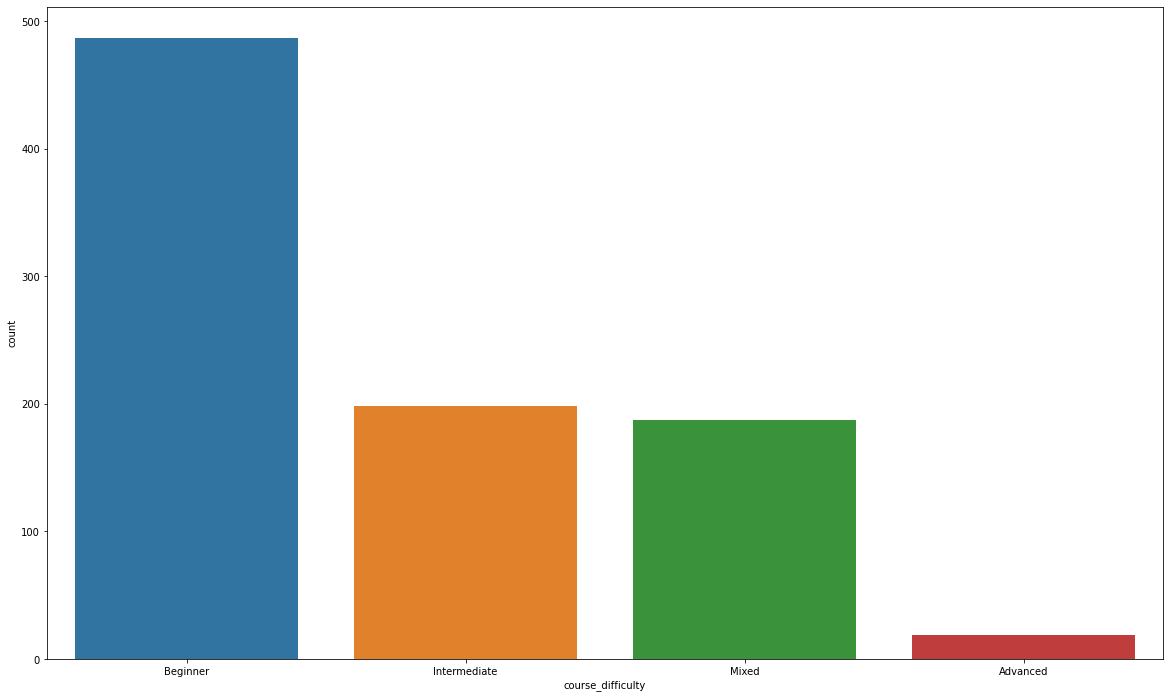

In [16]:

fig_dims = (20,12)
fig,ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='course_difficulty',data = df,ax=ax)

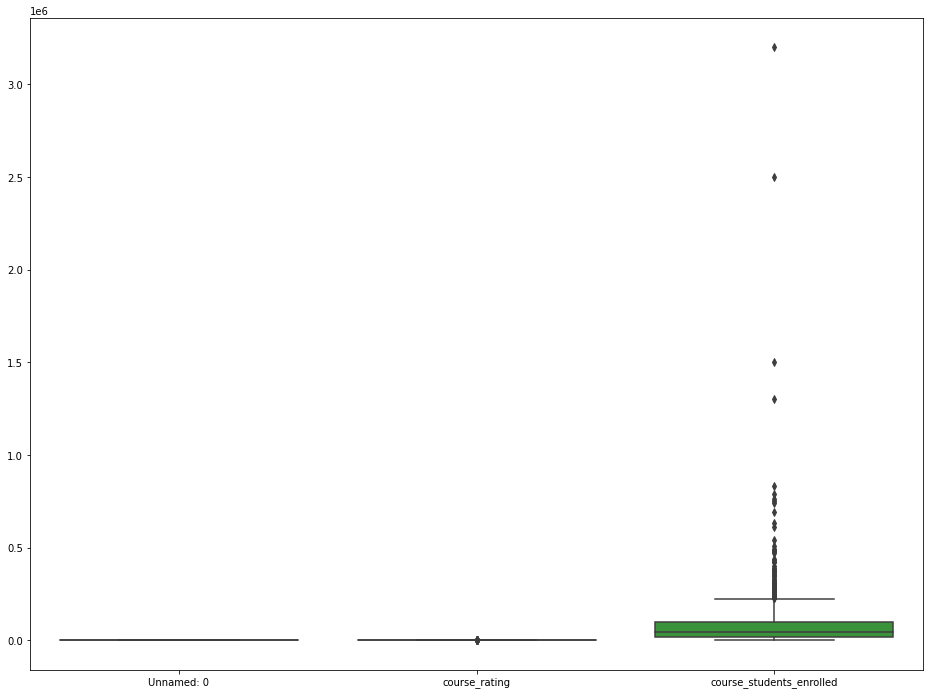

In [17]:
plt.figure(figsize=(16,12))
sns.boxplot(data=df)

#PIE CHART

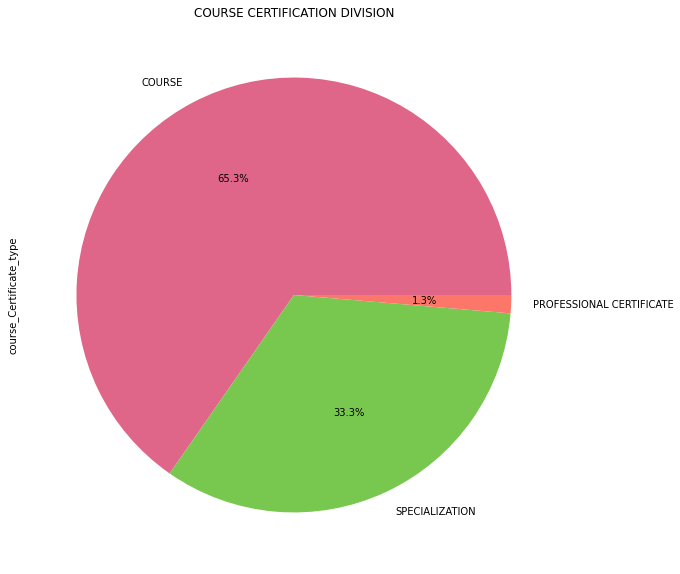

In [18]:

colors =  ["#DF6589FF", "#78C850","#FC766AFF"]
ax= df['course_Certificate_type'].value_counts(ascending=False).plot.pie(colors=colors,
            autopct='%1.1f%%',
            figsize=(15, 10))
plt.title('COURSE CERTIFICATION DIVISION') 
plt.show()

#Heatmap

In [19]:
teju = df.corr()
teju

,Unnamed: 0,course_rating,course_students_enrolled
Unnamed: 0,1.000000,-0.059561,-0.360839
course_rating,-0.059561,1.000000,0.071090
course_students_enrolled,-0.360839,0.071090,1.000000


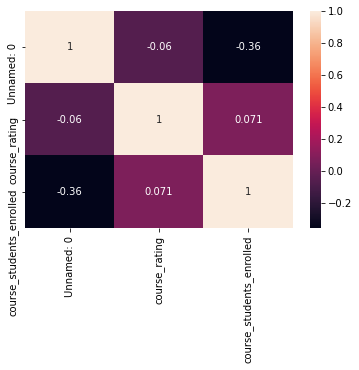

In [20]:
sns.heatmap(teju,annot=True)